# All the analysis has been done on the new export data tables

# A. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# 0. Reading and preparing the dataset

In [3]:
#read the data
woundassessment=pd.read_csv("tbl_WoundAssessment.csv",sep="|", low_memory=False)
#View the data
woundassessment

,WoundAssessmentID,DocumentID,WoundAssessmentNum,WoundID,WoundNumber,Length,Width,Depth,TunnelingOrUndermining,TunnelingUnderminingDistance,...,MuscleNecrosisExposed,JointNecrosisExposed,BoneNecrosisExposed,CapsuleNecrosisExposed,AdiposeExposed,AdiposeNecrosisExposed,PainPatientIsNotEligible,PainPatientIsNotEligibleReason,PainPatientIsNotEligibleReasonOther,IsTissueAnalyticsAssessment
0,56472004,414523311,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,56472043,414523850,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
2,56472073,414524131,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
3,56577198,416732515,NaN,14280880,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
4,56577265,416733814,NaN,14280880,NaN,20.0,20.0,20.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356431,107333477,1076469722,NaN,27074272,NaN,7.0,8.7,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356432,107333508,1076469997,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356433,107333519,1076470093,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356434,107333529,1076470211,NaN,27074281,NaN,9.8,9.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True


### Check if the dataframe is ragged or not

In [4]:
print("Number of columns in the dataframe:",woundassessment.shape[1])
print("Number of rows in the dataframe:",len(woundassessment.index))
print("Number of cells in the dataframe:",woundassessment.size)

print("Is the dataframe complete?", woundassessment.shape[1]*len(woundassessment.index)==woundassessment.size)

Number of columns in the dataframe: 301
Number of rows in the dataframe: 356436
Number of cells in the dataframe: 107287236
Is the dataframe complete? True


In [5]:
woundassessment=woundassessment.drop_duplicates()
woundassessment

,WoundAssessmentID,DocumentID,WoundAssessmentNum,WoundID,WoundNumber,Length,Width,Depth,TunnelingOrUndermining,TunnelingUnderminingDistance,...,MuscleNecrosisExposed,JointNecrosisExposed,BoneNecrosisExposed,CapsuleNecrosisExposed,AdiposeExposed,AdiposeNecrosisExposed,PainPatientIsNotEligible,PainPatientIsNotEligibleReason,PainPatientIsNotEligibleReasonOther,IsTissueAnalyticsAssessment
0,56472004,414523311,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,56472043,414523850,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
2,56472073,414524131,NaN,14280880,NaN,20.0,20.0,5.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
3,56577198,416732515,NaN,14280880,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
4,56577265,416733814,NaN,14280880,NaN,20.0,20.0,20.0,1.0,NaN,...,1.0,1.0,1.0,1.0,-1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356431,107333477,1076469722,NaN,27074272,NaN,7.0,8.7,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356432,107333508,1076469997,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356433,107333519,1076470093,NaN,27074281,NaN,10.6,10.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True
356434,107333529,1076470211,NaN,27074281,NaN,9.8,9.1,5.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaN,NaN,True


## Keeping only the required columns that we need for the analysis

In [6]:
woundassessment1=woundassessment[["DocumentID","WoundID","Length","Width","Depth"]]
woundassessment1=woundassessment1.drop_duplicates()
woundassessment1

,DocumentID,WoundID,Length,Width,Depth
0,414523311,14280880,20.0,20.0,5.0
1,414523850,14280880,20.0,20.0,5.0
2,414524131,14280880,20.0,20.0,5.0
3,416732515,14280880,NaN,NaN,NaN
4,416733814,14280880,20.0,20.0,20.0
...,...,...,...,...,...
356431,1076469722,27074272,7.0,8.7,5.0
356432,1076469997,27074281,10.6,10.1,5.0
356433,1076470093,27074281,10.6,10.1,5.0
356434,1076470211,27074281,9.8,9.1,5.0


## the woundmeasurement values are in mm, thus changing those to cm for our analysis

In [7]:
woundassessment2=pd.DataFrame()
woundassessment2["DocumentID"]=woundassessment1.loc[:,("DocumentID")]
woundassessment2["WoundID"]=woundassessment1.loc[:,("WoundID")]
woundassessment2["Length"]=woundassessment1.loc[:,("Length")]/10
woundassessment2["Width"]=woundassessment1.loc[:,("Width")]/10
woundassessment2["Depth"]=woundassessment1.loc[:,("Depth")]/10
woundassessment2.head()

,DocumentID,WoundID,Length,Width,Depth
0,414523311,14280880,2.0,2.0,0.5
1,414523850,14280880,2.0,2.0,0.5
2,414524131,14280880,2.0,2.0,0.5
3,416732515,14280880,NaN,NaN,NaN
4,416733814,14280880,2.0,2.0,2.0


## Adding the dates directing from the DocumentLibrary table

In [8]:
#This is the dataframe that we need to get the dates for each of the woundassessments
documentlibrary=pd.read_csv("tbl_DocumentLibrary.csv",sep="|",low_memory=False)
documentlibrary=documentlibrary.drop_duplicates()
documentlibrary

,DocumentID,DocumentType,Title,VisitID,PatientID,ParentDocumentID,DocumentDate,PhysicianID,ClinicianID,SecondClinicianID,...,SupervisingPhysicianID,ThirdProviderId,DepartmentID,JobClassID,DivisionID,LocationID,CompanyID,TimeZoneId,DateAddedUtc,HoursFromPittsburgh
0,430693544,WoundAssessmentDocument,Wound Assessment (Wound #3 Foot (mid)),59578356.0,5978401.0,4.439694e+08,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,430692379,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Proximal, La...",59578356.0,5978401.0,4.829236e+08,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,430690523,MedicalHistoryDocument,Medical History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,430690439,SocialHistoryDocument,Social History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,430690370,FamilyHistoryDocument,Family History,59578356.0,5978401.0,NaN,12/23/2016 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557474,1076253331,PhysicianOrdersDocument,Physician Orders,114676936.0,10175948.0,NaN,1/11/2023 12:00:00 AM,2525617.0,69799.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557475,1076252926,NPWTMaintenanceDocument,Negative Pressure Wound Therapy Maintenance (N...,114676936.0,10175948.0,1.074552e+09,1/11/2023 12:00:00 AM,2525617.0,69799.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Standard Time,1/11/2023 3:06:05 PM,0.0
3557476,1076248512,SuperBillDocument,SuperBill,114711559.0,9935079.0,NaN,1/10/2023 12:00:00 AM,2525617.0,70322.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557477,1076495552,ROSDocument,Review of Systems,114622592.0,9801314.0,NaN,1/11/2023 12:00:00 AM,2658140.0,70303.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Standard Time,1/11/2023 8:31:41 PM,0.0


In [9]:
document_dict_1 = pd.Series(documentlibrary.DateAdded.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_2 = pd.Series(documentlibrary.DateAddedUtc.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_3 = pd.Series(documentlibrary.DocumentDate.values,index = documentlibrary.DocumentID).to_dict()
#document_dict_4 = pd.Series(documentlibrary.FacilityID.values,index = documentlibrary.DocumentID).to_dict()
document_dict_assessmenttype=pd.Series(documentlibrary.DocumentType.values,index=documentlibrary.DocumentID).to_dict()
document_dict_title=pd.Series(documentlibrary.Title.values,index=documentlibrary.DocumentID).to_dict()
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()

In [10]:
#Now merging it to woundassessment table
woundassessment2['DateAdded'] = woundassessment2['DocumentID'].map(document_dict_1) 
#woundassessment2["DateAddedUtc"]=woundassessment2['DocumentID'].map(document_dict_2) 
#woundassessment2["DocumentDate"]=woundassessment2['DocumentID'].map(document_dict_3) 
#woundassessment2["FacilityID"]=woundassessment2['DocumentID'].map(document_dict_4) 
woundassessment2['DocumentType'] = woundassessment2['DocumentID'].map(document_dict_assessmenttype) 
woundassessment2['Title'] = woundassessment2['DocumentID'].map(document_dict_title) 
woundassessment2['PatientID'] = woundassessment2['DocumentID'].map(document_dict_patientid) 
woundassessment2

,DocumentID,WoundID,Length,Width,Depth,DateAdded,DocumentType,Title,PatientID
0,414523311,14280880,2.00,2.00,0.5,10/26/2016 2:09:08 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
1,414523850,14280880,2.00,2.00,0.5,10/26/2016 2:09:57 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
2,414524131,14280880,2.00,2.00,0.5,10/26/2016 2:10:26 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
3,416732515,14280880,NaN,NaN,NaN,11/1/2016 11:45:42 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
4,416733814,14280880,2.00,2.00,2.0,11/1/2016 11:47:24 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0
...,...,...,...,...,...,...,...,...,...
356431,1076469722,27074272,0.70,0.87,0.5,1/11/2023 2:57:20 PM,WoundAssessmentDocument,"Wound Assessment (Wound #2 Right, Plantar Foot )",10210112.0
356432,1076469997,27074281,1.06,1.01,0.5,1/11/2023 2:57:39 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0
356433,1076470093,27074281,1.06,1.01,0.5,1/11/2023 2:57:46 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0
356434,1076470211,27074281,0.98,0.91,0.5,1/11/2023 2:57:52 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0


In [11]:
woundassessment2["DocumentType"].value_counts()

WoundAssessmentDocument    356299
Name: DocumentType, dtype: int64

In [12]:
woundassessment= woundassessment2

df2=pd.read_csv("tbl_Wound.csv",sep="|",low_memory=False)
df2

,WoundID,DocumentID,WoundNumber,PatientID,PatientNumber,acquiredAtFacility,DateAcquired,NewOrRecurrent,Location,Left_Right,...,WoundRecurrence,PendingAmputationOnPresentation,ClusteredWound,ResolvedRecurrence,OriginalResolvedWoundID,TBSAPct,DischargedFromBurnCenter,WoundCondition,PrimaryWoundEtiologyType,PrimaryWoundEtiologyTypeCode
0,15694905,486301773,15,NaN,72510885,1.0,7/10/2017 12:00:00 AM,NaN,88,Right,...,False,False,False,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,15694904,486301772,14,NaN,72510885,1.0,5/30/2017 12:00:00 AM,NaN,51,Left,...,False,False,False,0.0,NaN,NaN,NaN,1.0,NaN,NaN
2,15694903,486301769,11,NaN,72510885,1.0,7/29/2016 12:00:00 AM,NaN,13,Left,...,False,False,False,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,15694902,486301766,13,NaN,72510885,1.0,4/17/2017 12:00:00 AM,NaN,88,Left,...,False,False,False,1.0,NaN,NaN,NaN,2.0,NaN,NaN
4,15694901,486301765,12,NaN,72510885,1.0,3/13/2017 12:00:00 AM,NaN,5,Right,...,False,False,False,1.0,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61546,27168950,1075496393,1,NaN,72926869,NaN,1/9/2023 12:00:00 AM,NaN,24,Left,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61547,27169201,1075507811,1,NaN,72926869,1.0,1/9/2023 12:00:00 AM,NaN,24,Left,...,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
61548,27169683,1075527662,3,NaN,71982871,NaN,1/9/2023 12:00:00 AM,NaN,8,Left,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61549,27170630,1075566658,3,NaN,71982871,1.0,1/9/2023 12:00:00 AM,NaN,8,Left,...,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#patient_dict=pd.Series(df2.PatientNumber.values,index = df2.WoundID).to_dict()
woundnumber_dict=pd.Series(df2.WoundNumber.values,index=df2.WoundID).to_dict()
#woundnumber_dict=pd.Series(df2.WoundNumber.values,index=df2.DocumentID).to_dict()


#woundassessment['Patient MRN'] = woundassessment['WoundID'].map(patient_dict)
woundassessment['WoundNumber']=woundassessment['WoundID'].map(woundnumber_dict)
woundassessment

,DocumentID,WoundID,Length,Width,Depth,DateAdded,DocumentType,Title,PatientID,WoundNumber
0,414523311,14280880,2.00,2.00,0.5,10/26/2016 2:09:08 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
1,414523850,14280880,2.00,2.00,0.5,10/26/2016 2:09:57 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
2,414524131,14280880,2.00,2.00,0.5,10/26/2016 2:10:26 PM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
3,416732515,14280880,NaN,NaN,NaN,11/1/2016 11:45:42 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
4,416733814,14280880,2.00,2.00,2.0,11/1/2016 11:47:24 AM,WoundAssessmentDocument,"Wound Assessment (Wound #1 Right, Plantar Foot)",5978401.0,1
...,...,...,...,...,...,...,...,...,...,...
356431,1076469722,27074272,0.70,0.87,0.5,1/11/2023 2:57:20 PM,WoundAssessmentDocument,"Wound Assessment (Wound #2 Right, Plantar Foot )",10210112.0,2
356432,1076469997,27074281,1.06,1.01,0.5,1/11/2023 2:57:39 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3
356433,1076470093,27074281,1.06,1.01,0.5,1/11/2023 2:57:46 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3
356434,1076470211,27074281,0.98,0.91,0.5,1/11/2023 2:57:52 PM,WoundAssessmentDocument,"Wound Assessment (Wound #3 Right, Posterior An...",10210112.0,3


In [14]:
woundassessment1=woundassessment[["PatientID","WoundNumber","Title","DateAdded","Length","Width"]]
woundassessment1

,PatientID,WoundNumber,Title,DateAdded,Length,Width
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:08 PM,2.00,2.00
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:57 PM,2.00,2.00
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:10:26 PM,2.00,2.00
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:45:42 AM,NaN,NaN
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:47:24 AM,2.00,2.00
...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",1/11/2023 2:57:20 PM,0.70,0.87
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:39 PM,1.06,1.01
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:46 PM,1.06,1.01
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:52 PM,0.98,0.91


## Converting the date column's format to only date because we have multiple wound assessment for single date

In [ ]:
# Using normalize() method
woundassessment1["DateAdded_New"]=np.nan
#woundassessment1
for i in range(woundassessment1.shape[0]):
    print(i)
    woundassessment1['DateAdded_New'][i] = pd.to_datetime(woundassessment1['DateAdded'][i]).date()
# woundassessment1

In [16]:
woundassessment1

,PatientID,WoundNumber,Title,DateAdded,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:08 PM,2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:09:57 PM,2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",10/26/2016 2:10:26 PM,2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:45:42 AM,NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",11/1/2016 11:47:24 AM,2.00,2.00,2016-11-01
...,...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",1/11/2023 2:57:20 PM,0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:39 PM,1.06,1.01,2023-01-11
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:46 PM,1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1/11/2023 2:57:52 PM,0.98,0.91,2023-01-11


In [17]:
woundassessment1=woundassessment1.drop(["DateAdded"],axis=1)
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
...,...,...,...,...,...,...
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356433,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [18]:
woundassessment1=woundassessment1.drop_duplicates()
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
6,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
7,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
...,...,...,...,...,...,...
356429,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
356431,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
356432,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
356434,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [20]:
woundassessment1=woundassessment1.reset_index()
woundassessment1=woundassessment1.drop(["index"],axis=1)
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",NaN,NaN,2016-11-01
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [21]:
woundassessment1.isnull().sum()

PatientID          106
WoundNumber          0
Title              106
Length           47079
Width            47238
DateAdded_New      106
dtype: int64

In [23]:
woundassessment1 = woundassessment1.dropna(subset=['Length', 'Width'])
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
5,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


In [24]:
woundassessment1.isnull().sum()

PatientID        98
WoundNumber       0
Title            98
Length            0
Width             0
DateAdded_New    98
dtype: int64

In [25]:
woundassessment1 = woundassessment1.dropna(subset=['PatientID', 'Title','DateAdded_New'])
woundassessment1

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01
3,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02
4,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02
5,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07
...,...,...,...,...,...,...
271023,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.91,1.03,2023-01-11
271024,10210112.0,2,"Wound Assessment (Wound #2 Right, Plantar Foot )",0.70,0.87,2023-01-11
271025,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",1.06,1.01,2023-01-11
271026,10210112.0,3,"Wound Assessment (Wound #3 Right, Posterior An...",0.98,0.91,2023-01-11


# Now that we have the dataframe ready for the analysis with only required columns,
# 1. Basic information about data - EDA

In [26]:
#Basic information

woundassessment1.info()

#Describe the data

woundassessment1.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 223666 entries, 0 to 271027
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientID      223666 non-null  float64
 1   WoundNumber    223666 non-null  object 
 2   Title          223666 non-null  object 
 3   Length         223666 non-null  float64
 4   Width          223666 non-null  float64
 5   DateAdded_New  223666 non-null  object 
dtypes: float64(3), object(3)
memory usage: 11.9+ MB


,PatientID,Length,Width
count,2.236660e+05,223666.000000,223666.000000
mean,7.769826e+06,3.249722,2.752972
std,1.433007e+06,23.350533,5.015883
min,5.117750e+06,-0.390000,0.000000
25%,6.421747e+06,0.600000,0.500000
50%,7.728339e+06,1.540000,1.400000
75%,9.150229e+06,3.900000,3.300000
max,1.023748e+07,9341.000000,805.000000


# 2. Duplicate values

In [27]:
#Find the duplicates

woundassessment1.duplicated().sum()

0

In [28]:
#drop duplicates

woundassessment1=woundassessment1.drop_duplicates()

woundassessment1.duplicated().sum()

0

# 3. Unique values in the data

Here we only need to analyze the wound measurement values, thus we do not need the unique values here

# 4. Visualize the Unique counts

We are not getting into the unique values here

# 5. Find the Null values

In [29]:
#Find null values

woundassessment1.isnull().sum()

PatientID        0
WoundNumber      0
Title            0
Length           0
Width            0
DateAdded_New    0
dtype: int64

# 7. Know the datatypes

In [30]:
#Datatypes

woundassessment.dtypes

DocumentID        int64
WoundID           int64
Length          float64
Width           float64
Depth           float64
DateAdded        object
DocumentType     object
Title            object
PatientID       float64
WoundNumber      object
dtype: object

In [31]:
woundassessment1["PatientID"]=woundassessment1["PatientID"].astype("object")
#woundassessment3["WoundID"]=woundassessment3["WoundID"].astype("object")
#woundassessment3["FacilityID"]=woundassessment3["FacilityID"].astype("object")
woundassessment1.dtypes

PatientID         object
WoundNumber       object
Title             object
Length           float64
Width            float64
DateAdded_New     object
dtype: object

# Merging this woundassessment table with other tables

In [ ]:
df_Patient=pd.read_csv("tbl_Patient.csv",sep="|")
#df_Patient=df_Patient.drop(["Unnamed: 0"],axis=1)
df_Patient["RaceCodeList"].isnull().sum()

df_Patient=df_Patient.replace({'2106-3':'White','2028-9':'Asian', '2054-5':'Black','asku':'ASKU',
                               '2076-8':'Native Hawaiian or Other Pacific Islander',
                               '1002-5':'American Indian or Alaska Native','2131-1':'Other'})

for i in range(df_Patient.shape[0]):
    if str(df_Patient['patientEthnicity'][i])=='nan':
        if str(df_Patient['ethnicityCdcCode'][i])!='nan':
            df_Patient['patientEthnicity'][i]=df_Patient['ethnicityCdcCode'][i]
            print(i)

In [35]:
woundassessment4=pd.merge(woundassessment1,df_Patient,on="PatientID")
woundassessment4

,PatientID,WoundNumber,Title,Length,Width,DateAdded_New,PatientNumber,PatientLName,PatientFName,PatientMName,...,PatientPreviousMNameFull,PatientPreviousFName,PatientPreviousAddress1,PatientPreviousAddress2,PatientPreviousCity,PatientPreviousState,PatientPreviousZip,PatientPreviousZip2,PatientPreviousCounty,DateNameChanged
0,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-10-26,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-01,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.00,2.00,2016-11-02,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5978401.0,2,"Wound Assessment (Wound #2 Left, Plantar Great...",2.00,2.00,2016-11-02,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5978401.0,1,"Wound Assessment (Wound #1 Right, Plantar Foot)",2.50,3.00,2016-11-07,1234,Test,Susan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223661,10215285.0,1,"Wound Assessment (Wound #1 Right, Plantar Grea...",0.91,1.20,2023-01-10,72426228,CHITTICK,CHAD,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223662,10215285.0,1,"Wound Assessment (Wound #1 Right, Plantar Grea...",0.91,1.20,2023-01-10,72426228,CHITTICK,CHAD,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223663,10223584.0,1,Wound Assessment (Wound #1 Left Forearm ),4.18,3.56,2023-01-11,72959819,RAMIREZ,MISTY,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223664,10223584.0,1,Wound Assessment (Wound #1 Left Forearm),4.18,3.56,2023-01-11,72959819,RAMIREZ,MISTY,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
woundassessment5=woundassessment4[['PatientID','DateAdded_New','WoundNumber',
 'Length','Width','PatientGender','RaceCodeList','patientEthnicity','PatientDOB']]
woundassessment5
#woundassessment5.isnull().sum()

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB
0,5978401.0,2016-10-26,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
1,5978401.0,2016-11-01,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
2,5978401.0,2016-11-02,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
3,5978401.0,2016-11-02,2,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
4,5978401.0,2016-11-07,1,2.50,3.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM
...,...,...,...,...,...,...,...,...,...
223661,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,9.0,9/23/1980 12:00:00 AM
223662,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,9.0,9/23/1980 12:00:00 AM
223663,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,9.0,7/13/1980 12:00:00 AM
223664,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,9.0,7/13/1980 12:00:00 AM


In [ ]:
# Using normalize() method
woundassessment5["PatientDOB_New"]=np.nan
#woundassessment1
for i in range(woundassessment5.shape[0]):
    print(i)
    woundassessment5['PatientDOB_New'][i] = pd.to_datetime(woundassessment5['PatientDOB'][i]).date()
# woundassessment1

In [38]:
woundassessment5["patientEthnicity"]=woundassessment5["patientEthnicity"].replace({9.0:"Non-Hispanic",
                                                                                   10.0:"Hispanic",
                                                                                   11.0:"Patient Declined",
                                                                                   '2186-5':'Non-Hispanic',
                                                                                   '2135-2':'Hispanic'})
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,NaN,NaN,NaN,1/23/1945 12:00:00 AM,1945-01-23
...,...,...,...,...,...,...,...,...,...,...
223661,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
223662,10215285.0,2023-01-10,1,0.91,1.20,M,NaN,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
223663,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13
223664,10223584.0,2023-01-11,1,4.18,3.56,F,NaN,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13


In [39]:
#Imputing the NaN values for Gender, Race and Ethnicity
#df_US['price'].fillna(df_US['price'].mean(), inplace = True)
woundassessment5["PatientGender"]=woundassessment5["PatientGender"].fillna('Unknown')
woundassessment5["RaceCodeList"]=woundassessment5["RaceCodeList"].fillna('Unknown')
woundassessment5["patientEthnicity"]=woundassessment5["patientEthnicity"].fillna('Unknown')

In [40]:
woundassessment5=woundassessment5.drop_duplicates()
woundassessment5=woundassessment5.reset_index()
woundassessment5=woundassessment5.drop(["index"],axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1/23/1945 12:00:00 AM,1945-01-23
...,...,...,...,...,...,...,...,...,...,...
209064,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,3/8/1938 12:00:00 AM,1938-03-08
209065,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
209066,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,9/23/1980 12:00:00 AM,1980-09-23
209067,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,7/13/1980 12:00:00 AM,1980-07-13


In [41]:
print("Value counts for Gender:")
print(woundassessment5["PatientGender"].value_counts())
print("\n")
print("Value counts for Race:")
print(woundassessment5["RaceCodeList"].value_counts())
print("\n")
print("Value counts for Ethnicity:")
print(woundassessment5["patientEthnicity"].value_counts())

Value counts for Gender:
M          119100
F           89801
Unknown       168
Name: PatientGender, dtype: int64


Value counts for Race:
Unknown                                      125324
White                                         65256
Black                                         17885
ASKU                                            328
Asian                                           207
American Indian or Alaska Native                 57
Native Hawaiian or Other Pacific Islander         8
Other                                             4
Name: RaceCodeList, dtype: int64


Value counts for Ethnicity:
Non-Hispanic        159314
Unknown              47497
Hispanic              2165
Patient Declined        91
ASKU                     2
Name: patientEthnicity, dtype: int64


In [42]:
woundassessment5.isnull().sum()

PatientID            0
DateAdded_New        0
WoundNumber          0
Length               0
Width                0
PatientGender        0
RaceCodeList         0
patientEthnicity     0
PatientDOB          32
PatientDOB_New      32
dtype: int64

In [44]:
woundassessment5=woundassessment5.drop(["PatientDOB"], axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23
...,...,...,...,...,...,...,...,...,...
209064,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08
209065,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23
209066,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23
209067,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13


In [51]:
woundassessment5 = woundassessment5.dropna(subset=['PatientDOB_New'])

In [54]:
woundassessment5=woundassessment5.reset_index()
woundassessment5=woundassessment5.drop(["index"],axis=1)
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,NaN
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,NaN
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,NaN
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,NaN


In [ ]:
# Using normalize() method
woundassessment5["Age"]=np.nan
#woundassessment1
for i in range(woundassessment5.shape[0]):
    print(i)
    woundassessment5['Age'][i] = round((((woundassessment5["DateAdded_New"][i]-woundassessment5["PatientDOB_New"][i]).days)/365),2)
# woundassessment1

In [56]:
woundassessment5

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


# 8. Removing negative wound measurement values

In [57]:
# woundassessment7=pd.DataFrame()
# woundassessment7["DateAddedEST"]=woundassessment3.loc[:,("DateAddedEST")]
# woundassessment7["WoundID"]=woundassessment3.loc[:,("WoundID")]
woundassessment6=woundassessment5.reset_index()
woundassessment6=woundassessment6.drop(["index"],axis=1)
woundassessment6["Length"]=abs(woundassessment6.loc[:,("Length")])
woundassessment6["Width"]=abs(woundassessment6.loc[:,("Width")])
#woundassessment6["Depth"]=abs(woundassessment6.loc[:,("Depth")])
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


In [58]:
#Describe the data

woundassessment6.describe()


,Length,Width,Age
count,209037.000000,209037.000000,209037.000000
mean,3.249693,2.769883,60.455821
std,24.129239,5.132550,16.159048
min,0.000000,0.000000,-0.050000
25%,0.540000,0.500000,50.060000
50%,1.500000,1.400000,62.170000
75%,3.900000,3.300000,71.540000
max,9341.000000,805.000000,105.980000


Now we see that there is no negative value in the dataframe's wound measurements

# 10. Finding and removing outliers

## Now that the duplicated and negative data is removed, we will check for the outliers

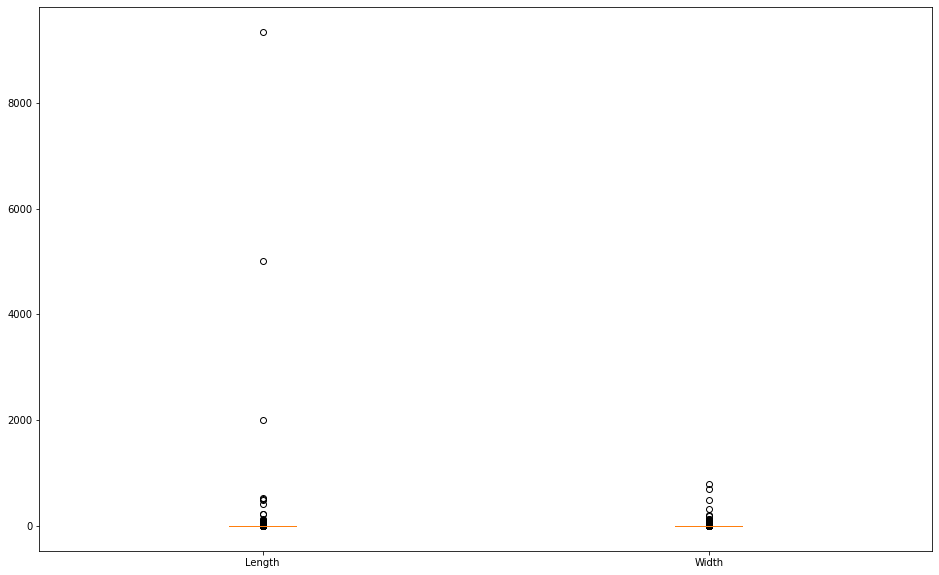

In [59]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

## Three heavily high outliers can be seen for Wound Length, removing those.

In [60]:
for i in range(3):
    list_remove_index=[]
    outlier_length=woundassessment6["Length"].max()
    print(outlier_length)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Length==@outlier_length")
    j=dff_out.index
    print(int(j.values))
    j=int(j.values)
    list_remove_index.append(j)
    woundassessment6.drop(list_remove_index,axis=0,inplace=True)

woundassessment6

9341.0
107118
5017.0
84366
2003.0
140668


,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209032,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209033,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209034,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209035,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


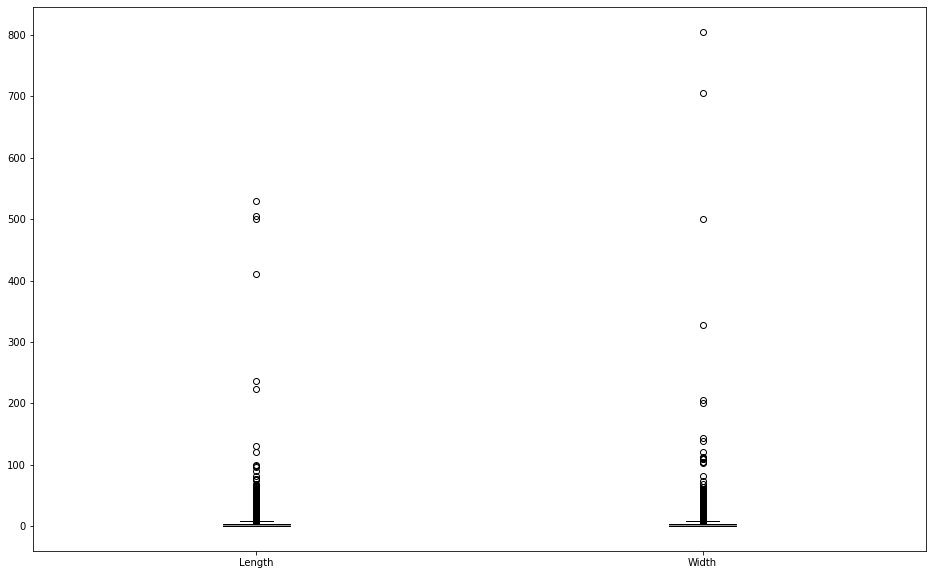

In [61]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

In [62]:
woundassessment6=woundassessment6.reset_index(drop=True)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


### Now let's remove the outliers in each Wound length and width as seen from the boxplot if the value is greater than 100

In [63]:
for i in range(100):
    outlier_width=woundassessment6["Width"].max()
    if outlier_width<100:
        break
    print(outlier_width)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Width==@outlier_width")
    j=dff_out.index
    #print(int(j.values))
    #j=int(j.values)
    for k in range(j.shape[0]):
        list_remove_index=[]
        list_remove_index.append(j[k])
        woundassessment6.drop(list_remove_index,axis=0,inplace=True)

        
for i in range(100):
    outlier_length=woundassessment6["Length"].max()
    if outlier_length<100:
        break
    print(outlier_length)
#     for j in range(woundassessment6.shape[0]):
#         if woundassessment6.iloc[i][4] >= outlier_length:
    dff_out=woundassessment6.query("Length==@outlier_length")
    j=dff_out.index
    #print(int(j.values))
    #j=int(j.values)
    for k in range(j.shape[0]):
        list_remove_index=[]
        list_remove_index.append(j[k])
        woundassessment6.drop(list_remove_index,axis=0,inplace=True)

woundassessment6

805.0
705.0
501.0
328.0
206.0
200.0
143.0
138.0
120.0
112.0
111.0
110.0
105.0
103.0
530.0
505.0
410.0
236.0
224.0
131.0
120.8


,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,PatientDOB_New,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,1945-01-23,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,1945-01-23,71.84
...,...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,1938-03-08,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,1980-09-23,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,1980-09-23,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,1980-07-13,42.53


In [64]:
woundassessment6=woundassessment6.drop(["PatientDOB_New"],axis=1)
woundassessment6.reset_index(drop=True)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


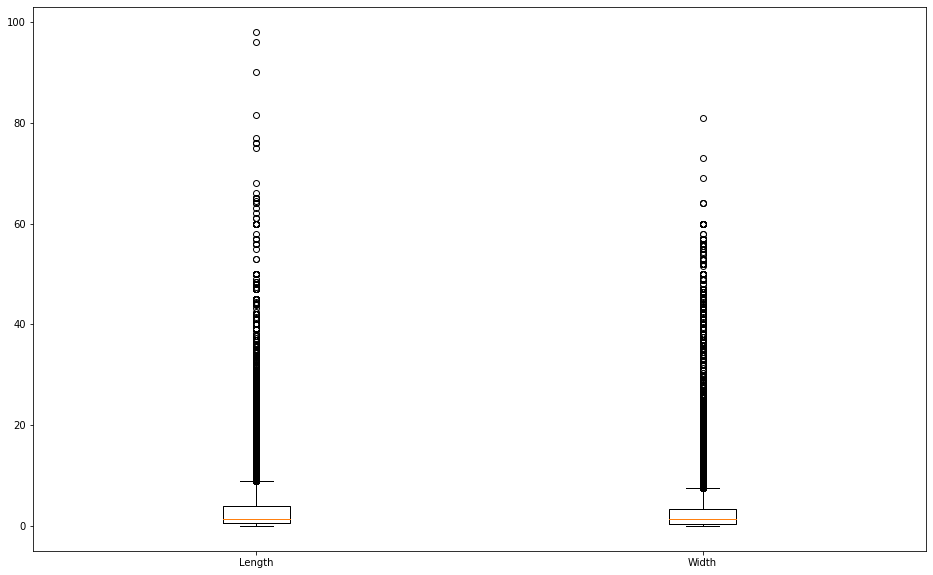

In [65]:
#Creating box plots separately for Length, Width and Depth

data=woundassessment6.dropna()

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

data = [x1,x2]

fig, ax = plt.subplots(figsize=(16,10))
ax.boxplot(data, labels =["Length", "Width"])

plt.show()

In [66]:
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209029,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209030,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209031,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209032,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


In [67]:
woundassessment6=woundassessment6.reset_index()
woundassessment6=woundassessment6.drop(["index"],axis=1)
woundassessment6

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209005,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209006,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209007,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209008,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


## checking the correlation

,Length,Width,Age
Length,1.000000,0.674297,-0.001001
Width,0.674297,1.000000,-0.003153
Age,-0.001001,-0.003153,1.000000


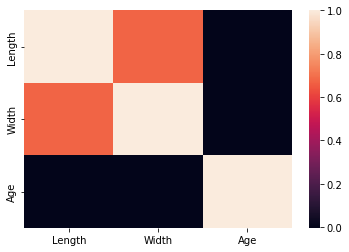

In [68]:
#Correlation plot

sns.heatmap(woundassessment6.corr())

woundassessment6.corr()

In [69]:
## Checking the IQR

data=woundassessment6

x1=data["Length"][~np.isnan(data["Length"])]
x2=data["Width"][~np.isnan(data["Width"])]
#x3=data["Depth"][~np.isnan(data["Depth"])]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

#data = [x1,x2,x3]
data=x1

print("IQR for Length:")
q1, q3 = np.percentile(x1,[25,75])
print("q1", q1, "q3",q3)

iqr=q3-q1
print("iqr", iqr)

lower_fence= q1-iqr*2
higher_fence= q3+ iqr*2
print("lower fence:", lower_fence, "higher fence:", higher_fence, "\n")

print("IQR for Width:")
q1, q3 = np.percentile(x2,[25,75])
print("q1", q1, "q3",q3)

iqr=q3-q1
print("iqr", iqr)

lower_fence= q1-iqr*2
higher_fence= q3+ iqr*2
print("lower fence:", lower_fence, "higher fence:", higher_fence, "\n")


# print("IQR for Depth:")
# q1, q3 = np.percentile(x3,[25,75])
# print("q1", q1, "q3",q3)

# iqr=q3-q1
# print("iqr", iqr)

# lower_fence= q1-iqr*2
# higher_fence= q3+ iqr*2
# print("lower fence:", lower_fence, "higher fence:", higher_fence)

IQR for Length:
q1 0.54 q3 3.9
iqr 3.36
lower fence: -6.18 higher fence: 10.62 

IQR for Width:
q1 0.5 q3 3.3
iqr 2.8
lower fence: -5.1 higher fence: 8.899999999999999 



## (Ignore) Removing the outlier

In [70]:
# dataframe_with_outliers= woundassessment6
# list_remove_index=[]
# for i in range(dataframe_with_outliers.shape[0]):
#     if dataframe_with_outliers.iloc[i][3] >= 10.8 or dataframe_with_outliers.iloc[i][4] >= 8.91:
#         list_remove_index.append(i)
#         print(i)
        
# dataframe_with_outliers.drop(list_remove_index,axis=0,inplace=True)
# dataframe_without_outliers= dataframe_with_outliers
# dataframe_without_outliers.head()

In [71]:
# dataframe_without_outliers=dataframe_without_outliers.reset_index(drop=True)
# dataframe_without_outliers

In [72]:
# #now checking the boxplots for all

# #Creating box plots separately for Length, Width and Depth

# data=dataframe_without_outliers.dropna()

# x1=data["Length"]
# x2=data["Width"]
# #x3=data["Depth"]

# x1=np.array(x1)
# x2=np.array(x2)
# #x3=np.array(x3)

# data = [x1,x2]

# fig, ax = plt.subplots(figsize=(16,10))
# ax.boxplot(data, labels =["Length", "Width"])

# plt.show()

## seeing through the histograms

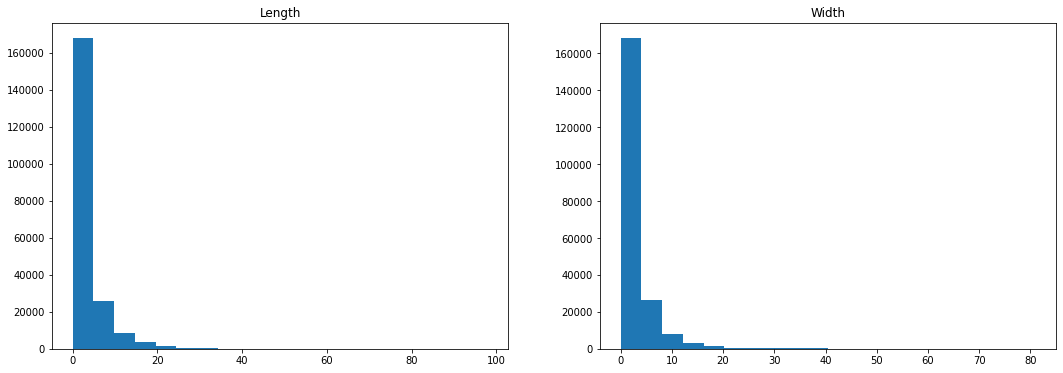

In [73]:
#data=dataframe_without_outliers

data=woundassessment6

x1=data["Length"]
x2=data["Width"]
#x3=data["Depth"]

x1=np.array(x1)
x2=np.array(x2)
#x3=np.array(x3)

fig, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].hist(x1, bins=20)
ax[1].hist(x2, bins=20)
#ax[2].hist(x3, bins=20)

ax[0].set_title("Length")
ax[1].set_title("Width")
#ax[2].set_title("Depth")

plt.show()

# 11. Correlation plot

## checking the correlations

In [74]:
data=data.reset_index(drop=True)
data.head()

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.0,2.0,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.0,2.0,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.0,2.0,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.0,2.0,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.5,3.0,Unknown,Unknown,Unknown,71.84


<AxesSubplot:>

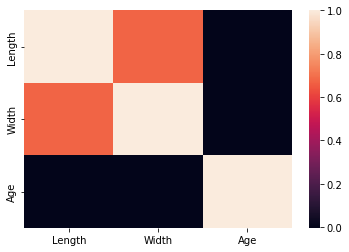

In [75]:
#Correlation plot

sns.heatmap(data.corr())

## Summary

In [ ]:
woundassessment=data
df=data
df=df.sort_values(by=['PatientID'])
unique_patients=df["PatientID"].unique().tolist()

unique_wounds=0
for i in range(len(unique_patients)):
    patientID=unique_patients[i]
    df1=df.query("PatientID == @patientID")
    wounds=len(df1["WoundNumber"].unique())
    unique_wounds=unique_wounds+wounds
    print(i)

In [78]:
print("Number of unique patients in the dataframe is", len(unique_patients))
#print("\n")
print("Number of unique wounds in the dataset",unique_wounds)
print("\n")
print("Value counts for Gender:")
print(woundassessment["PatientGender"].value_counts())
print("\n")
print("Value counts for Race:")
print(woundassessment["RaceCodeList"].value_counts())
print("\n")
print("Value counts for Ethnicity:")
print(woundassessment["patientEthnicity"].value_counts())

Number of unique patients in the dataframe is 8490
Number of unique wounds in the dataset 24420


Value counts for Gender:
M          119079
F           89780
Unknown       151
Name: PatientGender, dtype: int64


Value counts for Race:
Unknown                                      125282
White                                         65248
Black                                         17881
ASKU                                            323
Asian                                           207
American Indian or Alaska Native                 57
Native Hawaiian or Other Pacific Islander         8
Other                                             4
Name: RaceCodeList, dtype: int64


Value counts for Ethnicity:
Non-Hispanic        159295
Unknown              47463
Hispanic              2159
Patient Declined        91
ASKU                     2
Name: patientEthnicity, dtype: int64


In [80]:
data

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81
1,5978401.0,2016-11-01,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
2,5978401.0,2016-11-02,1,2.00,2.00,Unknown,Unknown,Unknown,71.82
3,5978401.0,2016-11-02,2,2.00,2.00,Unknown,Unknown,Unknown,71.82
4,5978401.0,2016-11-07,1,2.50,3.00,Unknown,Unknown,Unknown,71.84
...,...,...,...,...,...,...,...,...,...
209005,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90
209006,10215285.0,2023-01-10,1,0.94,1.17,M,Unknown,Non-Hispanic,42.33
209007,10215285.0,2023-01-10,1,0.91,1.20,M,Unknown,Non-Hispanic,42.33
209008,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53


# Merging with BMI and Smoking Status

In [ ]:
nutrition_assessment=pd.read_csv("tbl_PatientNutritionAssessmentInstance.csv",sep='|')
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()
nutrition_assessment['PatientID'] = nutrition_assessment['DocumentID'].map(document_dict_patientid)
bmi=nutrition_assessment[["PatientID","BMI"]]
#bmi_dict=pd.Series(nutrition_assessment.BMI.values,index=.DocumentID).to_dict()
data_1=pd.merge(data,bmi,on="PatientID")
data_1

In [97]:
df_social_history=pd.read_csv("tbl_SocialHistoryPatientInstances.csv",sep="|")
document_dict_patientid=pd.Series(documentlibrary.PatientID.values,index=documentlibrary.DocumentID).to_dict()
df_social_history['PatientID'] = df_social_history['DocumentID'].map(document_dict_patientid)
df_social_history
smoking_status=df_social_history[["PatientID","SmokingStatus"]]
data_2=pd.merge(data_1,smoking_status,on="PatientID")
data_2

,PatientID,DateAdded_New,WoundNumber,Length,Width,PatientGender,RaceCodeList,patientEthnicity,Age,BMI,SmokingStatus
0,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
1,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
2,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
3,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
4,5978401.0,2016-10-26,1,2.00,2.00,Unknown,Unknown,Unknown,71.81,27.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1726829,10219057.0,2023-01-09,2,4.05,6.11,M,White,Non-Hispanic,73.30,44.6,3.0
1726830,10219057.0,2023-01-09,2,4.16,5.59,M,White,Non-Hispanic,73.30,44.6,3.0
1726831,10225856.0,2023-01-10,1,1.36,0.72,M,White,Non-Hispanic,84.90,19.7,3.0
1726832,10223584.0,2023-01-11,1,4.18,3.56,F,Unknown,Non-Hispanic,42.53,34.5,1.0


In [102]:
data_2.to_csv("2_data_for_imputation_may11.csv")